In [3]:
source("./libs.R")

# LOAD data  -------------------------------------------------------------

dat.prom <- rbind(data.frame(fread("./dat/alpha.100_bin_pseudotime_raw.promoter.txt")%>%
                               add_column(bin=1:100,.before = 1)%>%
  gather(key="gene",value = "percent",-1), celltype='alpha'),
  data.frame(data.frame(fread("./dat/beta.100_bin_pseudotime_raw.promoter.txt")%>%
                          add_column(bin=1:100,.before = 1)%>%
                          gather(key="gene",value = "percent",-1), celltype='beta')))

# thresholds to decide 1 and 2 
bin.threshold.alpha <- round(1.4265/1.9208*100)
bin.threshold.beta <- round((10.3107-9.39)/(11.27-9.39)*100)

# add subtype label
dat.prom <- (dat.prom%>%
  mutate(subtype=ifelse(celltype=="alpha" & bin <=bin.threshold.alpha, 1,
                        ifelse(celltype=="alpha" & bin >bin.threshold.alpha,2,
                               ifelse(bin <=bin.threshold.beta,1,2)))))


## raw data distribution check

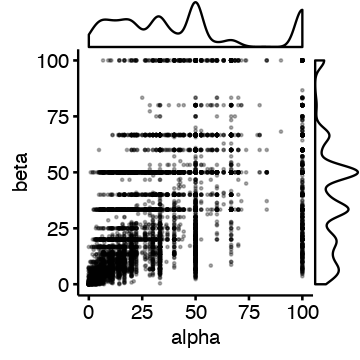

In [11]:
# explore data ------------------------------------------------------------
options(repr.plot.width =3, repr.plot.height = 3)

dat.prom.max <- dat.prom%>%
  group_by(gene,celltype)%>%
  summarise(max.percent= max(percent))

require(ggpubr)

ggscatterhist(
  dat.prom.max%>%
    spread(key = "celltype",value = "max.percent"), x = "alpha", y = "beta", 
  size=.25,alpha = 0.3
  #color = "Species", # comment out this and last line to remove the split by species
  #margin.plot = "histogram", # I'd suggest removing this line to get density plots
  #margin.params = list(fill = "Species", color = "black", size = 0.2)
)